In [57]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import cufflinks as cf
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [58]:
df = pd.read_csv('market.csv')

In [59]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [60]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [61]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


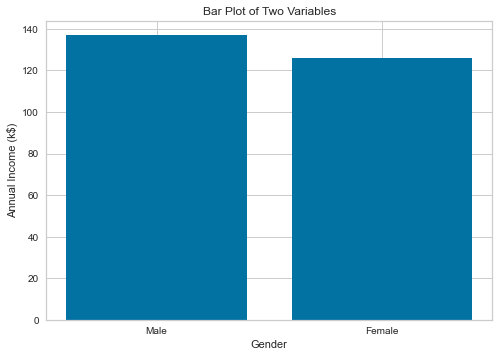

In [62]:
variable_1 = df['Gender']
variable_2 = df['Annual Income (k$)']

# Plot the bar plot
fig, ax = plt.subplots()
ax.bar(variable_1, variable_2)

# Add labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Annual Income (k$)')
ax.set_title('Bar Plot of Two Variables')

# Show the plot
plt.show()

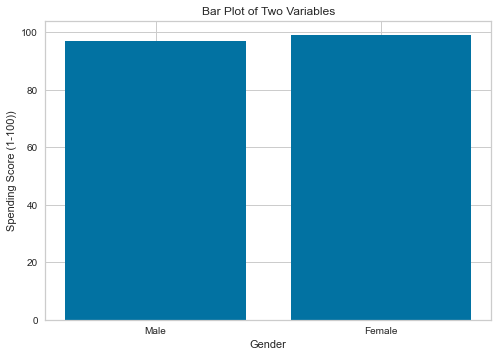

In [63]:
variable_1 = df['Gender']
variable_2 = df['Spending Score (1-100)']

# Plot the bar plot
fig, ax = plt.subplots()
ax.bar(variable_1, variable_2)

# Add labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Spending Score (1-100))')
ax.set_title('Bar Plot of Two Variables')

# Show the plot
plt.show()

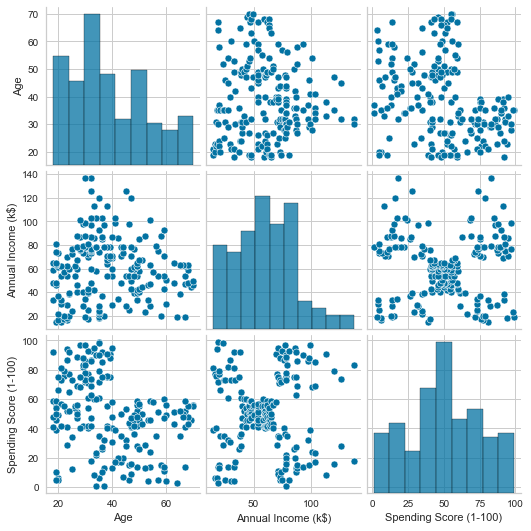

In [64]:
df = pd.DataFrame(data)

# Create the pair plot
sns.pairplot(df)

### Age & Annual Income & Spending Score this time using a 3d scatter plot

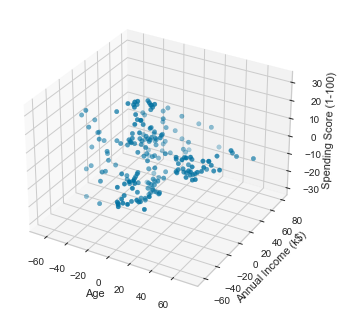

In [24]:
# Create a sample dataframe with three components
df1 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Perform PCA on three components (age, income, and Score)
pca = PCA(n_components=3)
pca.fit(df1)
df_pca = pca.transform(df1)

# Plot a 3D scatter plot of the PCA results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()


K clustering mean:  205.2251474767592


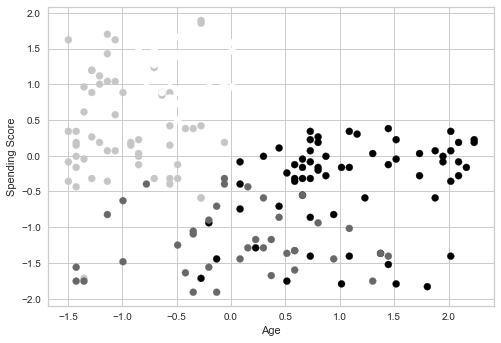

In [18]:
# Select the relevant columns
data = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Pre-processing
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Model training
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data_scaled)

# Model evaluation
print("K clustering mean: ", kmeans.inertia_)

# Visualization
plt.scatter(data_scaled[:,0], data_scaled[:,2], c=kmeans.labels_)
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

In [65]:
# Extract the features
X = df.iloc[:, [3, 4]].values

# Compute the sum of squared distances for different number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the sum of squared distances
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()


IndexError: positional indexers are out-of-bounds

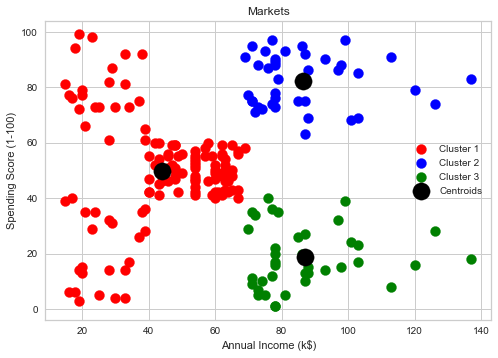

In [25]:
# Fit the k-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)

# Plot the data points with different colors for different clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')

plt.title('Markets')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Age & Annual Income

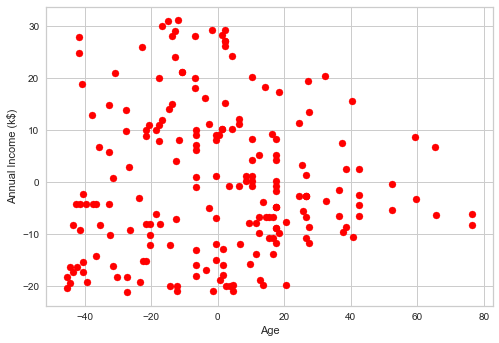

In [29]:
# Create a sample dataframe with three components
df1 = df[['Age', 'Annual Income (k$)']]

# Convert categorical variable "Gender" into numerical values
#df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Perform PCA on three components (age, and income)
pca = PCA(n_components=2)
pca.fit(df1)
df_pca = pca.transform(df1)

# Plot a 2D scatter plot of the PCA results
plt.scatter(df_pca[:, 0], df_pca[:, 1], c='red')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

### Annual Income & Spending Score

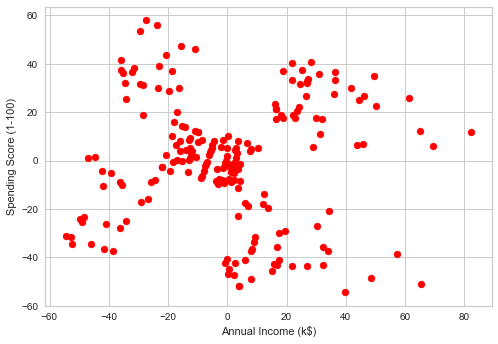

In [31]:
# Create a sample dataframe with three components
df1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Convert categorical variable "Gender" into numerical values
#df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Perform PCA on three components (age, and income)
pca = PCA(n_components=2)
pca.fit(df1)
df_pca = pca.transform(df1)

# Plot a 2D scatter plot of the PCA results
plt.scatter(df_pca[:, 0], df_pca[:, 1], c='red')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()